In [1]:
import numpy as np
import scipy.constants as const
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
def directional_coupler(splitratio  = 0.5):
              a = np.sqrt(1-splitratio)
              b = 1j*np.sqrt(splitratio)
              return [[a, b,], [b, a]]

def phase_shift(phi):
              return np.array([[np.exp(-1j*phi/2), 0], [0, np.exp(1j*phi/2)]])

def mzi(phi):
              return directional_coupler(0.5) @ phase_shift(phi) @ directional_coupler(0.5)

# input signal top element is TM and bottom is TE
def psr(delay, wavelength):
              phase_1 = 2*np.pi/wavelength * delay * const.c
              return np.array([[np.exp(-1j*phase_1), 0], [0, 1]])

In [3]:
wavelength = np.linspace(1.3, 1.32, 101) * 1e-6
pol_frac = np.linspace(0, 1, num=31)
theta_sweep = np.linspace(0.0, np.pi, 30)
delay = 1e-12 # 250 fs delay
output_signal_psrc_port1 = np.zeros((len(wavelength), len(pol_frac), len(theta_sweep)))
output_signal_psrc_port0 = np.zeros((len(wavelength), len(pol_frac), len(theta_sweep)))

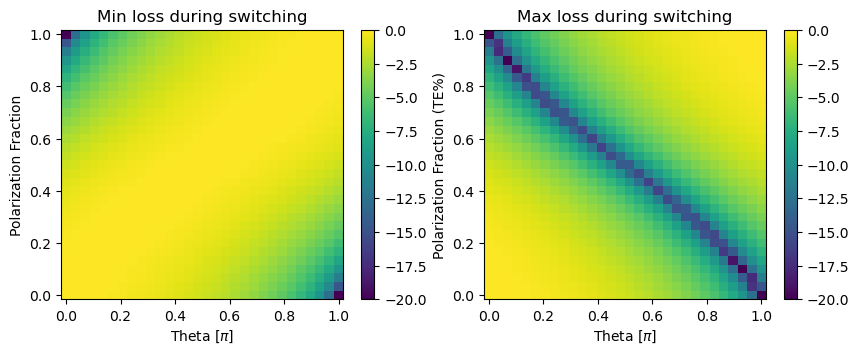

In [19]:
for idd_theta, theta_val in enumerate(theta_sweep):
              for idd_pol_frac, pol_frac_val in enumerate(pol_frac):
                            input_state = np.array([[pol_frac_val],[1-pol_frac_val]])/np.sqrt(pol_frac_val**2 + (1-pol_frac_val)**2)
                            for idd_wavelength, wavelength_val in enumerate(wavelength):
                                          response_value = directional_coupler(0.5) @ phase_shift(theta_val) @ directional_coupler(0.5) @ phase_shift(np.pi) @ directional_coupler(0.5) @ phase_shift(np.pi) @ directional_coupler(0.5) @ phase_shift(0.001) @ psr(delay, wavelength_val) @ input_state
                                          output_signal_psrc_port1[idd_wavelength][idd_pol_frac][idd_theta] = np.abs(response_value[0])
                                          output_signal_psrc_port0[idd_wavelength][idd_pol_frac][idd_theta] = np.abs(response_value[1])
max_signal_psrc_port1 = np.max(output_signal_psrc_port1, axis=0)
max_signal_psrc_port0 = np.max(output_signal_psrc_port0, axis=0)
min_signal_psrc_port1 = np.min(output_signal_psrc_port1, axis=0)
min_signal_psrc_port0 = np.min(output_signal_psrc_port0, axis=0)

X, Y = np.meshgrid(theta_sweep/np.pi, pol_frac)

fig = plt.figure(figsize=(10,3.5))
plt.subplot(1,2,1)
# plt.contourf(theta_sweep/np.pi, pol_frac, 10*np.log10(max_signal_psrc_port1), levels=100)
mesh = plt.pcolormesh(X, Y, 10*np.log10(max_signal_psrc_port1), shading='auto')
mesh.set_clim(-20,0)
plt.xlabel(r"Theta [$\pi$]")
plt.ylabel("Polarization Fraction")
plt.title("Min loss during switching")
plt.clim(-20,0)
plt.colorbar()
plt.subplot(1,2,2)
mesh = plt.pcolormesh(X, Y, 10*np.log10(min_signal_psrc_port1), shading='auto')
mesh.set_clim(-20,0)
plt.xlabel(r"Theta [$\pi$]")
plt.ylabel("Polarization Fraction (TE%)")
plt.title("Max loss during switching")
plt.colorbar()

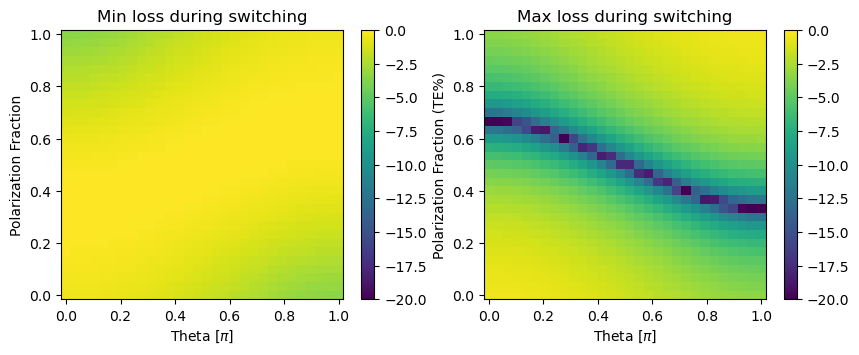

In [20]:
for idd_theta, theta_val in enumerate(theta_sweep):
              for idd_pol_frac, pol_frac_val in enumerate(pol_frac):
                            input_state = np.array([[pol_frac_val],[1-pol_frac_val]])/np.sqrt(pol_frac_val**2 + (1-pol_frac_val)**2)
                            for idd_wavelength, wavelength_val in enumerate(wavelength):
                                          response_value = directional_coupler(0.1) @ phase_shift(theta_val) @ directional_coupler(0.5) @ phase_shift(np.pi) @ directional_coupler(0.5) @ phase_shift(np.pi) @ directional_coupler(0.5) @ phase_shift(0.001) @ psr(delay, wavelength_val) @ input_state
                                          output_signal_psrc_port1[idd_wavelength][idd_pol_frac][idd_theta] = np.abs(response_value[0])
                                          output_signal_psrc_port0[idd_wavelength][idd_pol_frac][idd_theta] = np.abs(response_value[1])
max_signal_psrc_port1 = np.max(output_signal_psrc_port1, axis=0)
max_signal_psrc_port0 = np.max(output_signal_psrc_port0, axis=0)
min_signal_psrc_port1 = np.min(output_signal_psrc_port1, axis=0)
min_signal_psrc_port0 = np.min(output_signal_psrc_port0, axis=0)

X, Y = np.meshgrid(theta_sweep/np.pi, pol_frac)

fig = plt.figure(figsize=(10,3.5))
plt.subplot(1,2,1)
# plt.contourf(theta_sweep/np.pi, pol_frac, 10*np.log10(max_signal_psrc_port1), levels=100)
mesh = plt.pcolormesh(X, Y, 10*np.log10(max_signal_psrc_port1), shading='auto')
mesh.set_clim(-20,0)
plt.xlabel(r"Theta [$\pi$]")
plt.ylabel("Polarization Fraction")
plt.title("Min loss during switching")
plt.clim(-20,0)
plt.colorbar()
plt.subplot(1,2,2)
mesh = plt.pcolormesh(X, Y, 10*np.log10(min_signal_psrc_port1), shading='auto')
mesh.set_clim(-20,0)
plt.xlabel(r"Theta [$\pi$]")
plt.ylabel("Polarization Fraction (TE%)")
plt.title("Max loss during switching")
plt.colorbar()

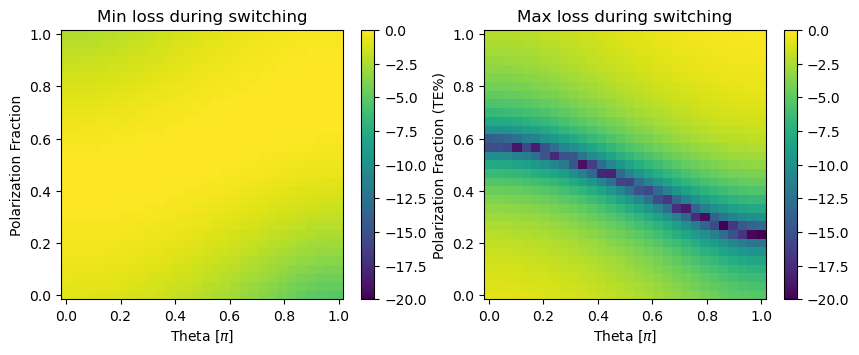

In [23]:
for idd_theta, theta_val in enumerate(theta_sweep):
              for idd_pol_frac, pol_frac_val in enumerate(pol_frac):
                            input_state = np.array([[pol_frac_val],[1-pol_frac_val]])/np.sqrt(pol_frac_val**2 + (1-pol_frac_val)**2)
                            for idd_wavelength, wavelength_val in enumerate(wavelength):
                                          response_value = directional_coupler(0.1) @ phase_shift(theta_val) @ directional_coupler(0.25) @ phase_shift(np.pi) @ directional_coupler(0.4) @ phase_shift(np.pi) @ directional_coupler(0.5) @ phase_shift(0.001) @ psr(delay, wavelength_val) @ input_state
                                          output_signal_psrc_port1[idd_wavelength][idd_pol_frac][idd_theta] = np.abs(response_value[0])
                                          output_signal_psrc_port0[idd_wavelength][idd_pol_frac][idd_theta] = np.abs(response_value[1])
max_signal_psrc_port1 = np.max(output_signal_psrc_port1, axis=0)
max_signal_psrc_port0 = np.max(output_signal_psrc_port0, axis=0)
min_signal_psrc_port1 = np.min(output_signal_psrc_port1, axis=0)
min_signal_psrc_port0 = np.min(output_signal_psrc_port0, axis=0)

X, Y = np.meshgrid(theta_sweep/np.pi, pol_frac)

fig = plt.figure(figsize=(10,3.5))
plt.subplot(1,2,1)
# plt.contourf(theta_sweep/np.pi, pol_frac, 10*np.log10(max_signal_psrc_port1), levels=100)
mesh = plt.pcolormesh(X, Y, 10*np.log10(max_signal_psrc_port1), shading='auto')
mesh.set_clim(-20,0)
plt.xlabel(r"Theta [$\pi$]")
plt.ylabel("Polarization Fraction")
plt.title("Min loss during switching")
plt.clim(-20,0)
plt.colorbar()
plt.subplot(1,2,2)
mesh = plt.pcolormesh(X, Y, 10*np.log10(min_signal_psrc_port1), shading='auto')
mesh.set_clim(-20,0)
plt.xlabel(r"Theta [$\pi$]")
plt.ylabel("Polarization Fraction (TE%)")
plt.title("Max loss during switching")
plt.colorbar()

In [ ]:
plt.plot()